# Differential equations

In [1]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import gekko as gk

### External predictor with discount factor

$y(t)$ An external predictor time series  
$ k $ A discount factor to apply on time

$\frac{dy(t)}{dt} = -k y(t)$

In [14]:
m = gk.GEKKO()    
k = 0.2        
y_init = 8
y = m.Var(y_init) 
m.Equation(y.dt()==-k*y) 

In [15]:
m.time = np.linspace(0,50)
m.options.IMODE = 4
m.solve()

apm 37.228.228.208_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:             98
 Number of total equations: -           98
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

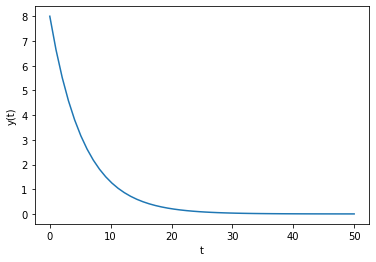

In [16]:
plt.plot(m.time,y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Acceleration of a process

$ y(t) $ process  
$ \frac{dy(t)}{dt} $ process change rate  
$ \frac{d^2y(t)}{dt} $ process acceleration

In [20]:
m = gk.GEKKO()
m.time = np.linspace(0,20,100)
k = 10

y = m.Var(value = 5.0)
t = m.Param(value=m.time)
dy = m.Var(value = 0.0)
d2y = m.Var(value = -5/10)

m.Equations([k*y.dt()==-t*y, dy == y.dt(), d2y == dy.dt()])

m.options.IMODE = 4
m.solve(disp=False)

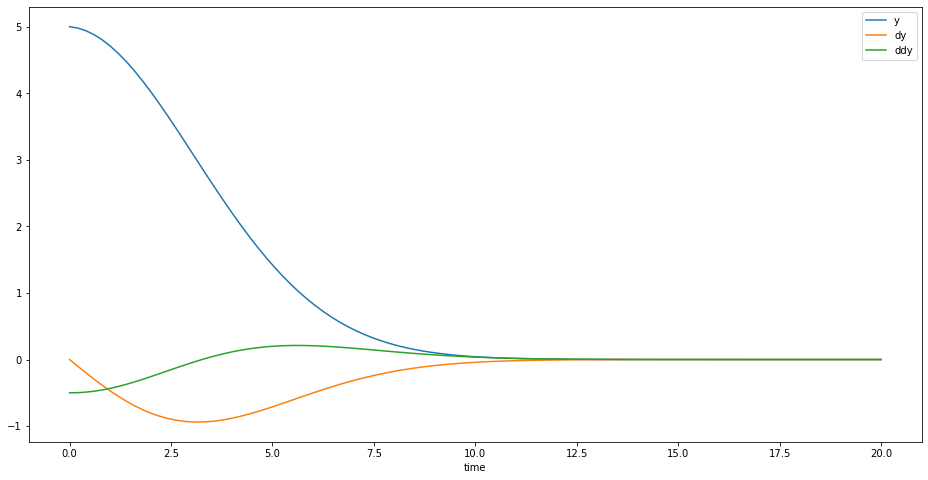

In [21]:
plt.figure(figsize=[16,8])
plt.plot(m.time,y.value, label = 'y')
plt.xlabel('time')
plt.plot(m.time, dy.value, label  = 'dy')
plt.xlabel('time')
plt.plot(m.time, ddy.value, label  = 'ddy')
plt.xlabel('time')
plt.legend()
plt.show()

### Credits & Links

https://gekko.readthedocs.io/en/latest/examples.html
https://stackoverflow.com/questions/57038180/how-do-you-define-a-second-derivative-in-the-python-gekko-module